### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [478]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [479]:
data = pd.read_csv('data/coupons.csv')

In [480]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Analysis
1. Checked datasets using info(), Describe(), head() etc.
2. Checked for duplicate data
3. Checked for missing values
4. Analyzed how to fill-in missing values
5. Finalized what data to drop

2. Investigate the dataset for missing or problematic data.

In [481]:
#Check counts, column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<Axes: title={'center': 'Duplicate Coupon Values'}, xlabel='coupon', ylabel='Duplicate Counts'>

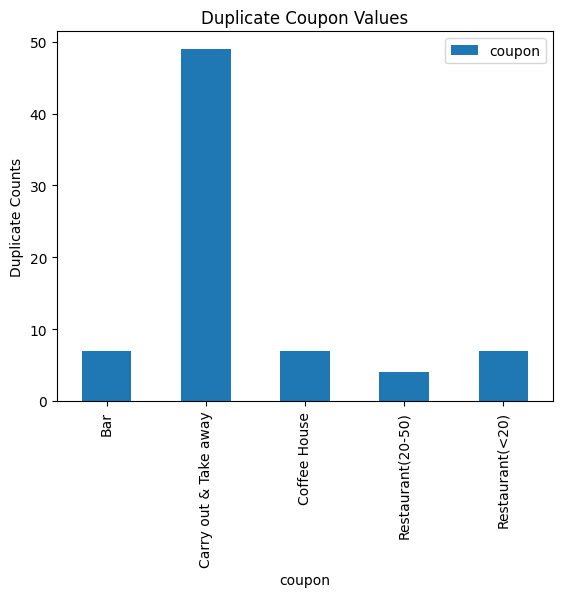

In [482]:
# Get duplicated values
Duplicate_data = data[data.duplicated()]

# Use groupby method and bar chart to get duplicate data spread
Duplicate_data.groupby('coupon')['coupon'].count() \
                      .plot(kind = 'bar', title = "Duplicate Coupon Values", ylabel = 'Duplicate Counts', legend='coupon')

<Axes: title={'center': 'Missing Data Values'}, xlabel='Column Categories', ylabel='Percent'>

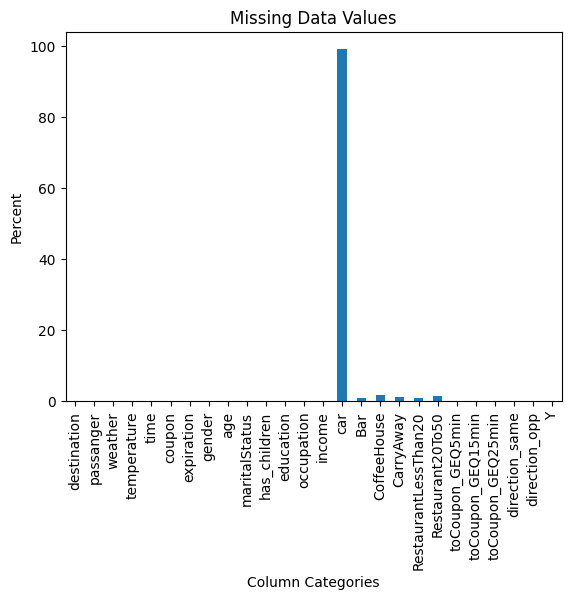

In [483]:
# Get Missing values as percentage
missing_data = data.isna().mean()*100

# Plot missing values
missing_data.plot(kind = 'bar', title = "Missing Data Values", xlabel= 'Column Categories', ylabel = 'Percent')

3. Decide what to do about your missing data -- drop, replace, other...

# Clean up
## 1. Drop 'Car' column data since greater than 99% is missing and is not useful for data analysis
## 2. Drop duplicated data of 74 rows as it is not going to impact the overall data of 12684 rows
## 3. Fill-in missing values for other columns using appropriate method (ex. mode)

In [484]:
# Make a copy
df=data.copy()

In [485]:
#Drop 'Car' column
df.drop(['car'], axis=1,inplace=True)


In [486]:
#Drop duplicated data
df.drop_duplicates(inplace=True)

In [487]:
#Fill-in null values with mode

#Bar fill-in
mode_value_bar = df['Bar'].mode()[0]
df['Bar'] = df['Bar'].fillna(mode_value_bar)

# CoffeeHouse Fill-in
mode_value_coffeeHouse = df['CoffeeHouse'].mode()[0]
df['CoffeeHouse'] = df['CoffeeHouse'].fillna(mode_value_coffeeHouse)

# Fill-in CarryAway
mode_value_carryAway = df['CarryAway'].mode()[0]
df['CarryAway'] = df['CarryAway'].fillna(mode_value_carryAway)

#Fill-in RestaurantLessThan20
mode_value_restaurant20 = df['RestaurantLessThan20'].mode()[0]
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(mode_value_restaurant20)

#Fill-in Restaurant20To50
mode_value_restaurant20To50 = df['Restaurant20To50'].mode()[0]
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(mode_value_restaurant20To50)

<Axes: title={'center': 'Clean data with no missing values'}, xlabel='Column Categories', ylabel='Percent'>

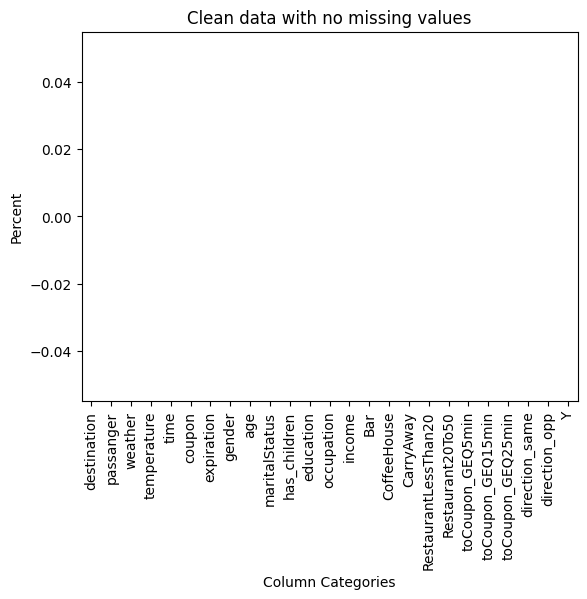

In [488]:
#Clean data with no null values
df.isna().mean().plot(kind = 'bar', title = "Clean data with no missing values", xlabel= 'Column Categories', ylabel = 'Percent')

4. What proportion of the total observations chose to accept the coupon?



# Observations
1. Carry out & Takeaway coupons were accepted **more** when presented
2. Similarly cheaper restaurant coupons (<20) were accepted **more** when presented
3. **Younger Age groups (<30)** tend to accept coupons when presented compared to other ages groups
4. When compared with **widowed & divorced** people, **single & married people** are lot willing to accept coupons

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

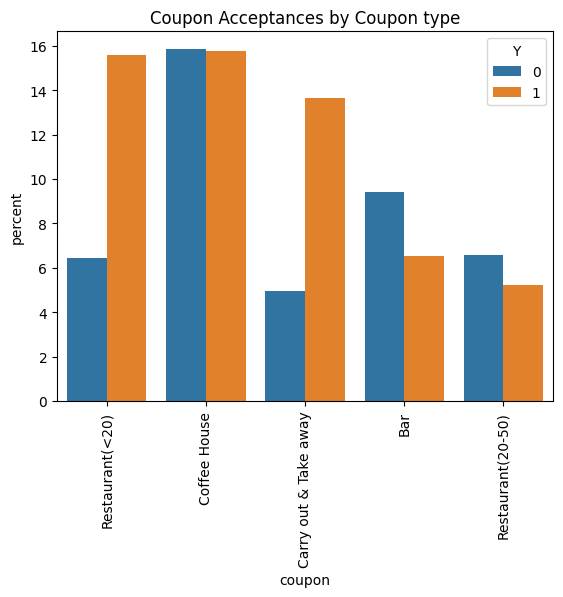

In [489]:
#Coupons Acceptances by Coupon Type
sns.countplot(data=df, x='coupon', stat= 'percent', hue='Y')
plt.title('Coupon Acceptances by Coupon type')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '21'),
  Text(1, 0, '46'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '41'),
  Text(5, 0, '50plus'),
  Text(6, 0, '36'),
  Text(7, 0, 'below21')])

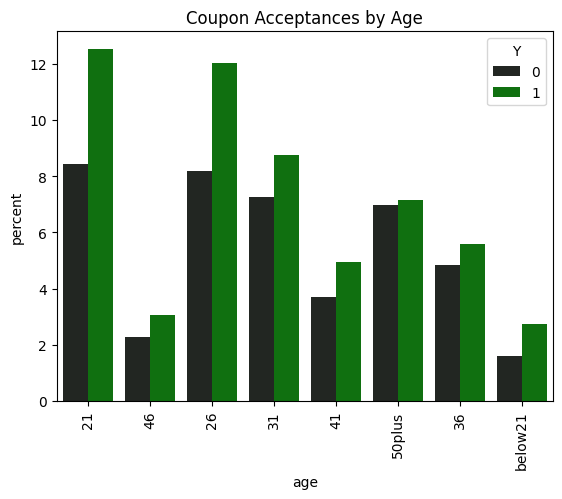

In [490]:
#Coupons Acceptances by Age
sns.countplot(data=df, x='age', stat= 'percent', hue='Y', color = 'green')
plt.title('Coupon Acceptances by Age')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Unmarried partner'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Married partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

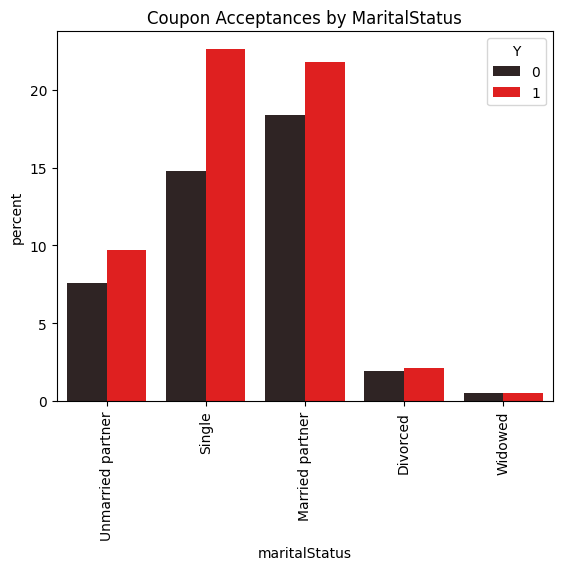

In [491]:
#Coupons Acceptances by Marital Status
sns.countplot(data=df, x='maritalStatus', stat= 'percent', hue='Y', color = 'red')
plt.title('Coupon Acceptances by MaritalStatus')
plt.xticks(rotation=90)

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Total Coupons by Coupons Type'}, xlabel='coupon'>

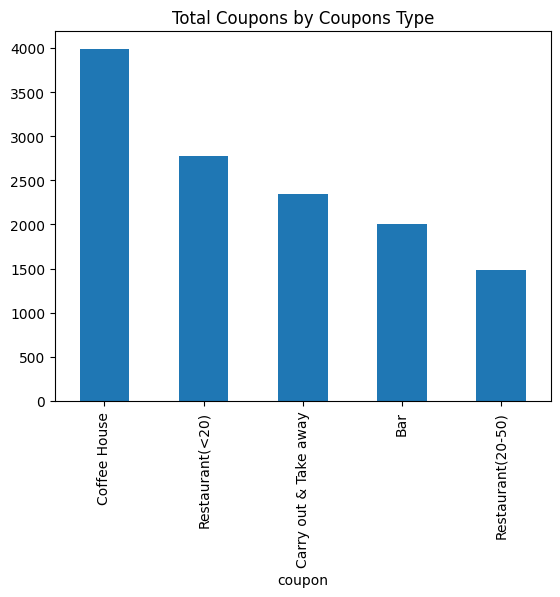

In [492]:
# Distribution of coupon counts by Coupon Type
df['coupon'].value_counts().plot(kind = 'bar', title = "Total Coupons by Coupons Type")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Histogram with KDE')

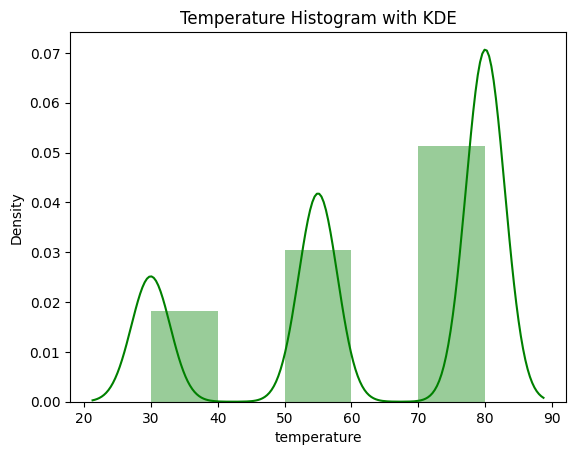

In [493]:
# Temperature histogram with KDE
sns.distplot(df['temperature'], kde=True, color = 'green', bins = 5)
plt.title('Temperature Histogram with KDE')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [494]:
df_bar = df.query('coupon == "Bar"')
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


([0], [Text(0, 0, 'Bar')])

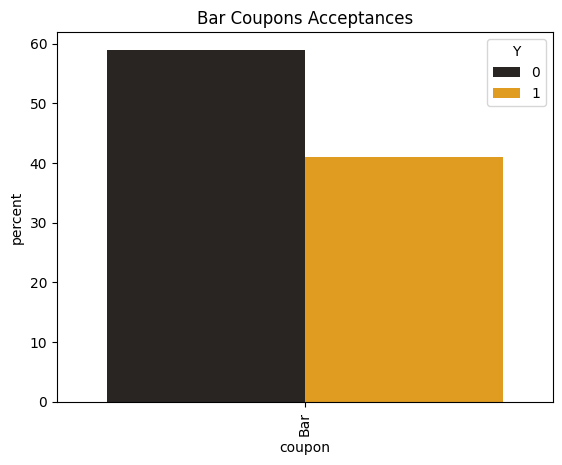

In [495]:
#Percent of bar coupons accepted (41% of Bar coupons accepted)
sns.countplot(data=df_bar, x='coupon', stat= 'percent', hue='Y', color='orange')
plt.title('Bar Coupons Acceptances' )
plt.xticks(rotation=90)

In [496]:
#Percent of coupons accepted
Accepted_coupon_percent = df_bar.query('Y == 1').shape[0] / df_bar.shape[0]*100
print("Accepted_coupon_percent:", Accepted_coupon_percent)


Accepted_coupon_percent: 40.99502487562189


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [497]:
#Drivers who went to Bar 3 times or fewer
drivers_who_went_to_bar_3timesOrFewer = df_bar.query('(Y ==1) and (Bar == "less1" or Bar == "1~3")').shape[0]
print("Drivers_who_went_to_bar_3timesOrFewer: ", drivers_who_went_to_bar_3timesOrFewer)

#Drivers who went to Bar more than 3 times
drivers_who_went_to_bar_morethan_3times = df_bar.query('(Y ==1) and (Bar == "4~8" or Bar == "gt8")').shape[0]
print("Drivers_who_went_to_bar_morethan_3times: ", drivers_who_went_to_bar_morethan_3times)

#Accetance Rate between those "drivers_who_went_to_bar_3timesOrFewer" to "drivers_who_went_go_to_bar_morethan_3times"
Accpt_rate_3_or_fewer = drivers_who_went_to_bar_3timesOrFewer / df_bar.shape[0] * 100
Accpt_rate_more_than_3 = drivers_who_went_to_bar_morethan_3times / df_bar.shape[0] * 100

print("Accpt_rate_3_or_fewer: ", Accpt_rate_3_or_fewer)
print("Accpt_rate_more_than_3: ", Accpt_rate_more_than_3)


Drivers_who_went_to_bar_3timesOrFewer:  507
Drivers_who_went_to_bar_morethan_3times:  153
Accpt_rate_3_or_fewer:  25.223880597014926
Accpt_rate_more_than_3:  7.611940298507462


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


**# Only 14.53 percent of people over Age of 25 accept coupons in this scenario**

In [498]:
#Age over 25 list
age_over_25 = ['26','31','36','41','46','50plus']

#Coupon_acceptance_and_Age_over_25_and_go_to_bar_morethanOnce
C_acpt_age_O_25_and_go_to_bar_more = df_bar[df_bar['age'].isin(age_over_25)] \
                                    .query('Bar == "1~3"or Bar == "4~8" or Bar == "gt8"').query('Y == 1').shape[0]

acceptance_rate = C_acpt_age_O_25_and_go_to_bar_more / df_bar.shape[0] * 100
print("Percent of people over of Age 25 accept coupons in this scenario is: ", acceptance_rate)


Percent of people over of Age 25 accept coupons in this scenario is:  14.527363184079602


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [499]:
#Accpetance count with condition "drivers who go to bars more than once a month
# and had passengers that were not a kid and had occupations other than farming, fishing, or forestry"
c_acpt_no_kid_condition = df_bar.query('occupation != "Farming Fishing & Forestry"') \
                                .query('passanger != "Kid(s)"') \
                                .query('Bar == "1~3"or Bar == "4~8" or Bar == "gt8"') \
                                .query('Y == 1').shape[0]

acceptance_rate = c_acpt_no_kid_condition / df_bar.shape[0]* 100
print("Acceptance count with no kids condition: ", c_acpt_no_kid_condition)
print("Acceptance percentage: ",acceptance_rate )


Acceptance count with no kids condition:  393
Acceptance percentage:  19.55223880597015


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [500]:
#6.1 Acceptance rate of who go to bars more than once a month, had passengers that were not a kid, and were not widowed).
Acceptance_rate_6_1= df_bar.query('Bar == "1~3"or Bar == "4~8" or Bar == "gt8"').query('passanger != "Kid(s)"').query('maritalStatus != "Widowed"').query('Y == 1').shape[0]

print("Acceptance Percentage for 6.1 scenario: ", Acceptance_rate_6_1/df_bar.shape[0]*100)

Acceptance Percentage for 6.1 scenario:  19.55223880597015


In [501]:
#6.2 Acceptance rate of who go to bars more than once a month and are under the age of 30
#Age under 30 list
age_under_30 = ['below21','21','26']

Acceptance_rate_6_2= df_bar[df_bar['age'].isin(age_under_30)].query('Bar == "1~3"or Bar == "4~8" or Bar == "gt8"').query('Y == 1').shape[0]
print("Acceptance Percentage for 6.2 scenario: ", Acceptance_rate_6_2/df_bar.shape[0]*100)

Acceptance Percentage for 6.2 scenario:  12.388059701492537


In [502]:
#6.3 Acceptance rate of who go to cheap restaurants more than 4 times a month and income is less than 50K
#Income under 50K
Income_under_50K = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

Acceptance_rate_6_3= df_bar[df_bar['income'].isin(Income_under_50K)] \
                     .query('RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8"') \
                     .query('Y == 1').shape[0]
print("Acceptance Percentage for 6.3 scenario: ",Acceptance_rate_6_3/df_bar.shape[0]*100)


Acceptance Percentage for 6.3 scenario:  7.761194029850746


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Observations on Bar coupons and drivers

1. **Only 41 % of Bar coupons were accepted by the drivers**

2. **The coupon acceptance rate of drivers who go to bar *more than 3 times a month* is very low at 7.6%**

3. **Acceptance rate of drivers who go to bar *more than once a month* and under the age of 30 is moderately high at 12.36%**

4. **Even though some drivers go to cheap restaurants more than 4 times a month but did not accept more bar coupons**

Based on results, **the age group under 30  and those who go to bar fewer times a month** are more willing to accept bar coupons when presented.








### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [503]:
# Create a new dataframe with coupons for Coffee House
df_ch = df.query('coupon == "Coffee House"')
df_ch.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


([0], [Text(0, 0, 'Coffee House')])

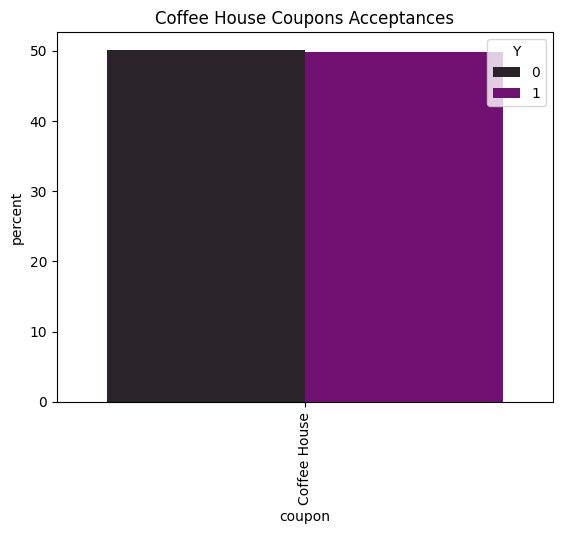

In [504]:
#Percent of Coffee coupons accepted (49.9% of Coffee coupons accepted)
sns.countplot(data=df_ch, x='coupon', stat= 'percent', hue='Y', color='purple')
plt.title('Coffee House Coupons Acceptances' )
plt.xticks(rotation=90)

In [505]:
#Percent of coupons accepted
Accepted_coupon_percent = df_ch.query('Y == 1').shape[0] / df_ch.shape[0]*100
print("Accepted_coupon_percent:", Accepted_coupon_percent)

Accepted_coupon_percent: 49.862120832288795


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '21'),
  Text(1, 0, '46'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '41'),
  Text(5, 0, '50plus'),
  Text(6, 0, '36'),
  Text(7, 0, 'below21')])

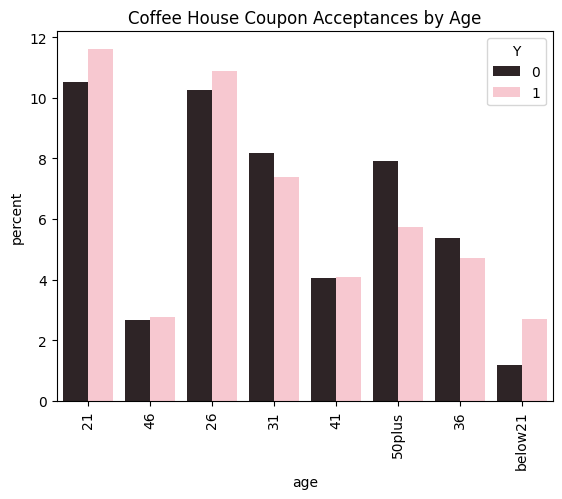

In [506]:
#Coffee House Coupons Acceptances by Age
sns.countplot(data=df_ch, x='age', stat= 'percent', hue='Y', color = 'pink')
plt.title('Coffee House Coupon Acceptances by Age')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, '10AM'),
  Text(1, 0, '2PM'),
  Text(2, 0, '6PM'),
  Text(3, 0, '7AM'),
  Text(4, 0, '10PM')])

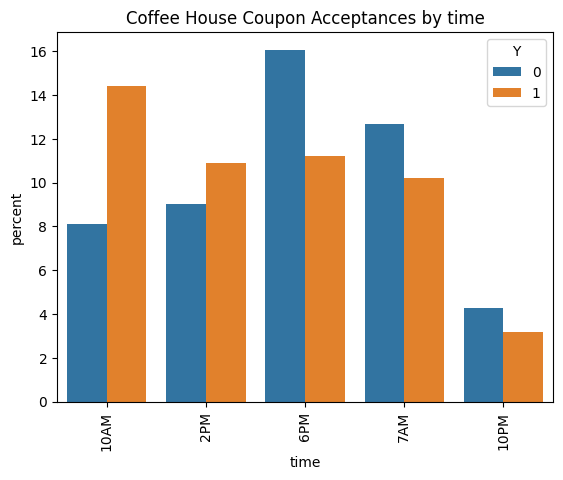

In [507]:
#Coupons Acceptances by Time
sns.countplot(data=df_ch, x='time', stat= 'percent', hue='Y')
plt.title('Coffee House Coupon Acceptances by time')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Unmarried partner'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Married partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

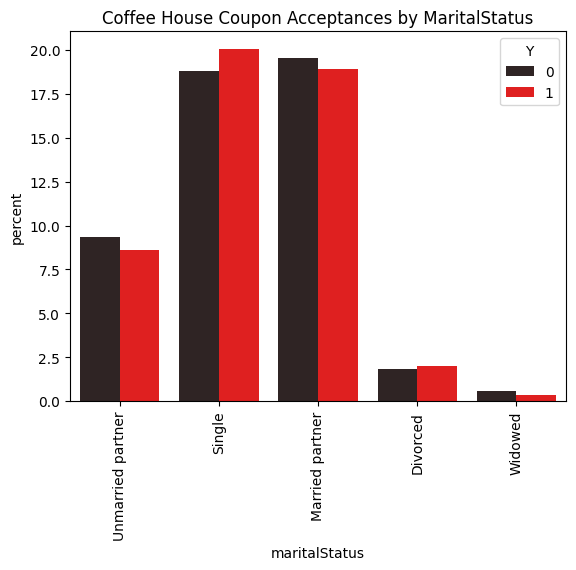

In [508]:
#Coupons Acceptances by Time
sns.countplot(data=df_ch, x='maritalStatus', stat= 'percent', hue='Y', color='red')
plt.title('Coffee House Coupon Acceptances by MaritalStatus')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Temperature Histogram with KDE')

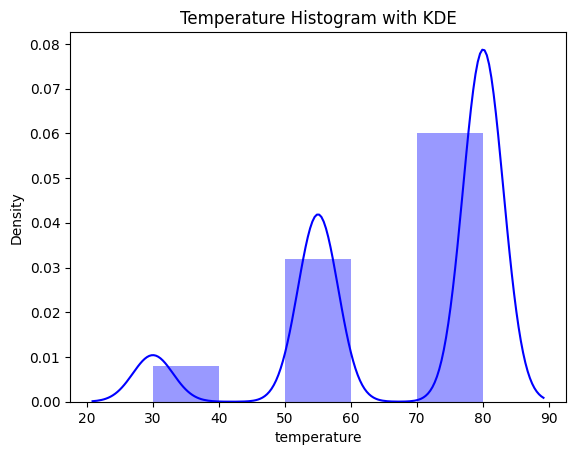

In [509]:
# Temperature histogram with KDE
sns.distplot(df_ch['temperature'], kde=True, color = 'blue', bins = 5)
plt.title('Temperature Histogram with KDE')